# Importing required packages

In [66]:
import pandas as pd
import sys
import math

In [68]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [102]:
import sklearn as skl


# Loading the 2011 Housing Market Typology dataset and retrieving basic data stats

In [27]:
dataFrame = pd.read_csv('../dat/Housing_Market_Typology_2011.csv')

In [55]:
print('Data Shape (#col x #row) = '+ str(len(dataFrame.columns))+ ' x ' + str(len(dataFrame)))

Data Shape (#col x #row) = 11 x 710


In [21]:
dataFrame.head(10)

,blockGroup,marketCategory,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
0,101001,Regional Choice,79,0.40,15.25,15225.00,0%,0%,0%,3%,$238000.00,78%
1,101002,Regional Choice,69,0.35,3.59,11975.00,1%,1%,1%,5%,$235000.00,69.4%
2,101003,Regional Choice,47,0.41,5.08,6100.00,0%,3%,0%,3%,$299000.00,78.6%
3,102001,Middle Market Choice,51,0.49,0.00,12300.00,1%,0%,2%,8%,$159900.00,68.8%
4,102002,Regional Choice,32,0.46,0.00,14100.00,0%,0%,2%,5%,$199694.00,77.2%
5,102003,Regional Choice,67,0.32,24577.62,16400.00,0%,0%,0%,3%,$230000.00,77.4%
6,102004,Middle Market Choice,33,0.48,0.00,5016.67,1%,0%,1%,7%,$143250.00,69.2%
7,103001,Regional Choice,54,0.42,12.93,2204.55,0%,3%,1%,4%,$232500.00,76.6%
8,103002,Regional Choice,87,0.46,22.04,22000.00,1%,0%,2%,6%,$189900.00,41.3%
9,104001,Regional Choice,61,0.38,1.61,8383.33,1%,1%,0%,3%,$200000.00,61.5%


In [54]:
dataFrame.drop('blockGroup', axis=1, inplace=True)

In [56]:
dataFrame.dtypes

marketCategory                     object
sales20092010                       int64
salesPriceCoefficientVariance     float64
commercialResidentialLandRatio    float64
unitsPerSquareMile                float64
residentialPermits                float64
vacantLots                        float64
vacantHouseNotices                float64
foreclosureFilings                float64
medianSalesPrice20092010          float64
ownerOccupied                     float64
dtype: object

# Cleansing data and dtypes

In [59]:
dataFrame['marketCategory']=dataFrame['marketCategory'].astype('category')

In [35]:
dataFrame['residentialPermits']=dataFrame['residentialPermits'].replace( '[\%]','', regex=True ).astype(float)

In [29]:
dataFrame['vacantLots']=dataFrame['vacantLots'].replace( '[\%]','', regex=True ).astype(float)

In [30]:
dataFrame['vacantHouseNotices']=dataFrame['vacantHouseNotices'].replace( '[\%]','', regex=True ).astype(float)

In [31]:
dataFrame['foreclosureFilings']=dataFrame['foreclosureFilings'].replace( '[\%]','', regex=True ).astype(float)

In [32]:
dataFrame['medianSalesPrice20092010']=dataFrame['medianSalesPrice20092010'].replace( '[\$]','', regex=True ).astype(float)

In [33]:
dataFrame['ownerOccupied']=dataFrame['ownerOccupied'].replace( '[\%]','', regex=True ).astype(float)

In [60]:
dataFrame.dtypes

marketCategory                    category
sales20092010                        int64
salesPriceCoefficientVariance      float64
commercialResidentialLandRatio     float64
unitsPerSquareMile                 float64
residentialPermits                 float64
vacantLots                         float64
vacantHouseNotices                 float64
foreclosureFilings                 float64
medianSalesPrice20092010           float64
ownerOccupied                      float64
dtype: object

# Preliminary Data Analysis

#### Describe numeric features in the data

In [63]:
dataFrame.describe()

,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,18.847887,0.602648,217.150817,5683.015211,0.616901,9.073239,7.405634,5.867606,96691.235211,48.385493
std,14.839127,0.307203,1668.778867,4703.420167,4.037867,12.361286,10.611167,17.069573,99209.184736,22.763382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.410000,0.327500,2758.455000,0.000000,2.000000,0.000000,3.000000,26062.500000,33.100000
50%,16.000000,0.570000,4.155000,4807.145000,0.000000,5.000000,1.000000,5.000000,62992.500000,48.000000
75%,25.000000,0.807500,15.897500,7510.717500,0.000000,11.000000,12.750000,7.000000,135187.500000,65.400000
max,99.000000,1.760000,30761.430000,71300.000000,100.000000,92.000000,55.000000,450.000000,670000.000000,100.000000


#### Compute histogram for blocks per market category

In [72]:
dataFrame.marketCategory.value_counts()

Distressed                                        209
Middle Market Choice                              117
Middle Market Stressed                            114
Regional Choice                                    94
Middle Market                                      92
< 5 Residential Sales (2009-2010)                  30
< 5 Sales; MultiFamily (>65% of Housing Units)     28
NR - Non-residential (<50 residential lots)        13
>50 residential lots; >40 % vacant lots             8
>50 residential lots; >50 % vacant lots             5
dtype: int64

#### Compute the correlation matrix for numeric features

In [73]:
dataFrame.corr(method='pearson')

,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
sales20092010,1.000000,0.082083,0.099650,0.192459,-0.063447,-0.299811,-0.097870,-0.039832,0.179156,0.354003
salesPriceCoefficientVariance,0.082083,1.000000,-0.005013,0.022925,-0.088735,0.008492,0.603257,-0.048127,-0.369738,-0.073071
commercialResidentialLandRatio,0.099650,-0.005013,1.000000,0.075088,-0.008375,-0.032488,0.005448,-0.010597,0.011312,0.069438
unitsPerSquareMile,0.192459,0.022925,0.075088,1.000000,0.531383,-0.224876,0.024173,-0.020884,0.063534,-0.228133
residentialPermits,-0.063447,-0.088735,-0.008375,0.531383,1.000000,0.037072,-0.010358,-0.012585,0.000923,-0.144334
vacantLots,-0.299811,0.008492,-0.032488,-0.224876,0.037072,1.000000,0.251381,0.234143,-0.244182,-0.398891
vacantHouseNotices,-0.097870,0.603257,0.005448,0.024173,-0.010358,0.251381,1.000000,-0.014662,-0.451016,-0.351354
foreclosureFilings,-0.039832,-0.048127,-0.010597,-0.020884,-0.012585,0.234143,-0.014662,1.000000,-0.084406,-0.103591
medianSalesPrice20092010,0.179156,-0.369738,0.011312,0.063534,0.000923,-0.244182,-0.451016,-0.084406,1.000000,0.300833
ownerOccupied,0.354003,-0.073071,0.069438,-0.228133,-0.144334,-0.398891,-0.351354,-0.103591,0.300833,1.000000


#### Conduct Principal Component Analysis (PCA) on the dataset

In [108]:
scaledDf = dataFrame.drop('marketCategory', axis=1)
scaledDf = skl.preprocessing.scale(scaledDf)
pca=skl.decomposition.PCA(n_components=10, whiten=True)
pca.fit(scaledDf)

PCA(copy=True, n_components=10, whiten=True)

In [109]:
pca.components_

array([[-0.28046768,  0.33869447, -0.05656142, -0.02973214,  0.03046751,
         0.38399055,  0.49308794,  0.11674214, -0.45741832, -0.43378308],
       [ 0.12487432,  0.01301619,  0.08154762,  0.71205068,  0.6223502 ,
        -0.15851059,  0.05040863, -0.07348265,  0.03106803, -0.2218546 ],
       [-0.43664312, -0.56387666, -0.14544924, -0.03729879,  0.20704622,
         0.36367102, -0.3414792 ,  0.27508186,  0.15542624, -0.27799116],
       [ 0.29967436, -0.02378354,  0.66907507,  0.05518198, -0.06226786,
         0.18954439, -0.01846078,  0.64320822, -0.04253049,  0.05702898],
       [-0.33301378, -0.14021927,  0.7111531 , -0.09303977, -0.0096804 ,
         0.04384472,  0.0118898 , -0.58660879,  0.00638225, -0.09347306],
       [ 0.42824043, -0.03693986, -0.06003687,  0.09535737, -0.30324635,
         0.38944466,  0.18070313, -0.21190432,  0.55436685, -0.41718458],
       [-0.24274214, -0.04368565,  0.04595219,  0.24643717, -0.52528062,
        -0.58116474, -0.05183059,  0.2036319 

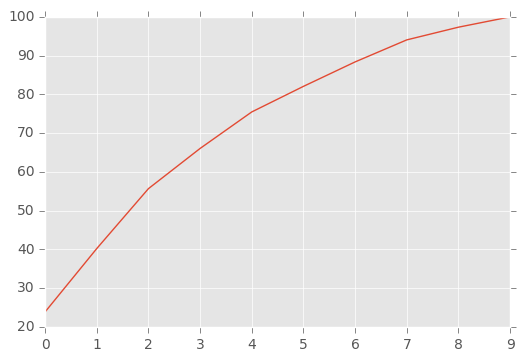

In [123]:
cumulativeVariance = pca.explained_variance_ratio_.cumsum()
# print(cumulativeVariance)
matplotlib.pyplot.plot(cumulativeVariance * 100)


#### Autocorrelation analysis by sorting on certain numeric features (EXPERIMENTAL)

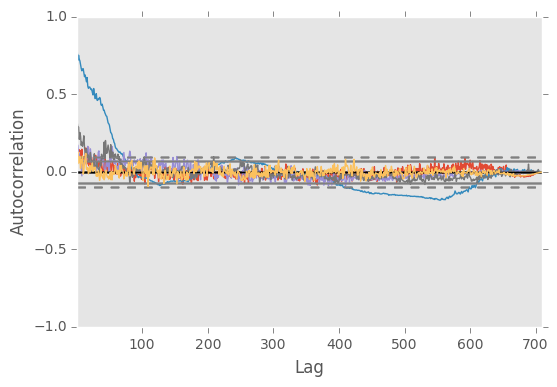

In [89]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(dataFrame.sort_values(by='unitsPerSquareMile').medianSalesPrice20092010)
autocorrelation_plot(dataFrame.sort_values(by='marketCategory').medianSalesPrice20092010)
autocorrelation_plot(dataFrame.sort_values(by='vacantLots').medianSalesPrice20092010)
autocorrelation_plot(dataFrame.sort_values(by='foreclosureFilings').medianSalesPrice20092010)
autocorrelation_plot(dataFrame.sort_values(by='sales20092010').medianSalesPrice20092010)